In [1]:
from iohblade.loggers import ExperimentLogger
from iohblade import plot_convergence, plot_experiment_CEG
import os

logger = ExperimentLogger('results/kerneltuner-all', True)

Failed to update token costs. Using static costs.
/home/neocortex/.cache/pypoetry/virtualenvs/blade-xXF9vABH-py3.10/lib/python3.10/site-packages/tokencost/constants.py:69: RuntimeWarning: coroutine 'update_token_costs' was never awaited
  logger.error("Failed to update token costs. Using static costs.")


In [2]:
methods, problems = logger.get_methods_problems()
print(methods)
print(problems)

['LLaMEA']
['kerneltuner-A100', 'kerneltuner-gemm', 'kerneltuner-general']


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


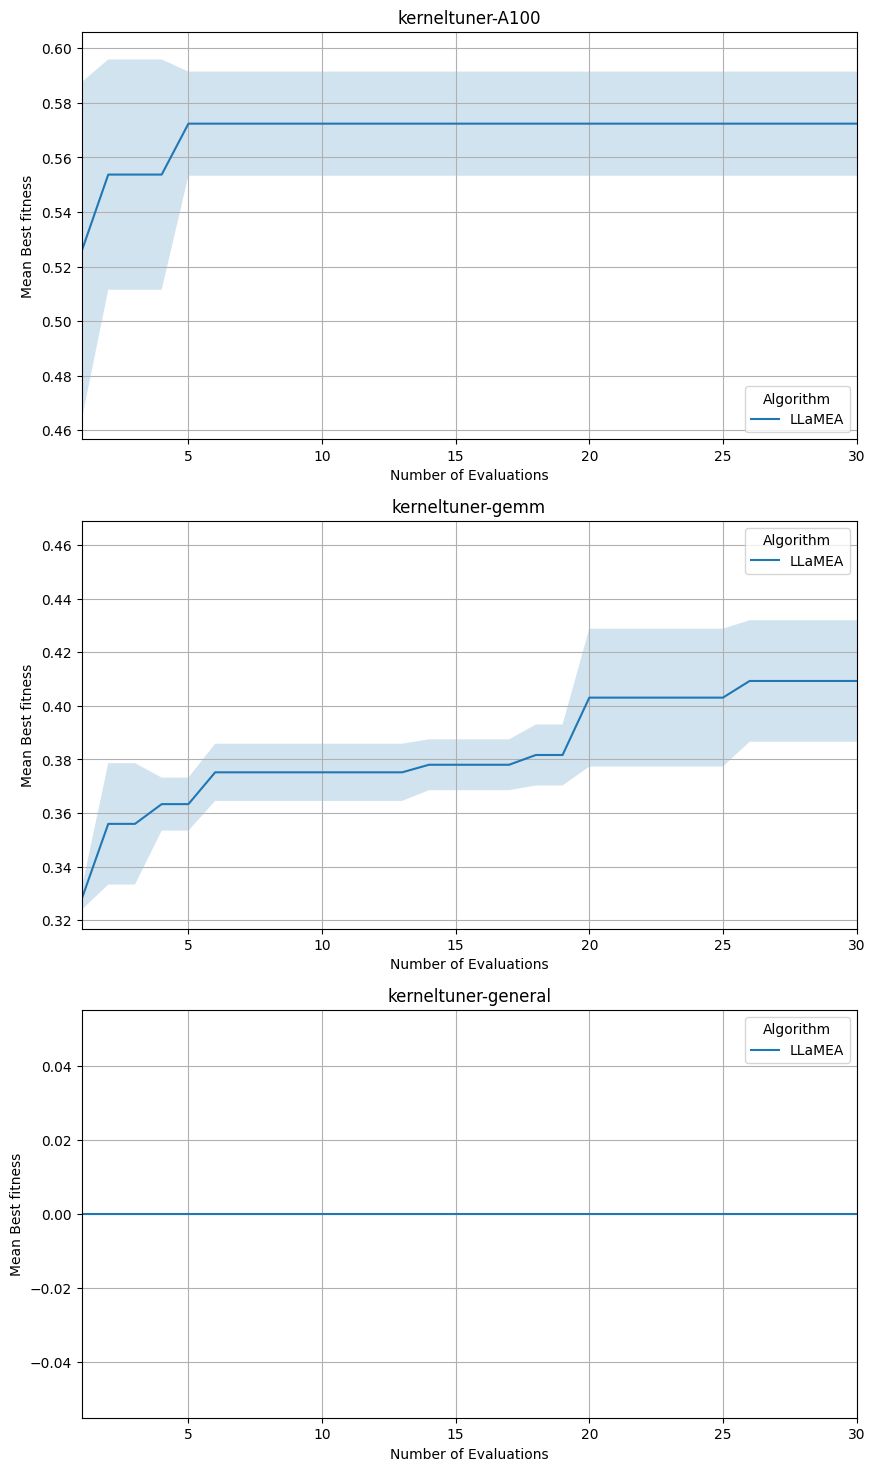

In [4]:
import numpy as np
import json



plot_convergence(logger, metric="fitness", save=False, budget=30)

